This Colab demonstrates how to use the FuzzBench analysis library to show experiment results that might not be included in the default report. 

# Get the data

Each report contains a link to the raw data,  e.g., see the bottom of our sample report: https://www.fuzzbench.com/reports/sample/index.html.

Find all our published reports at https://www.fuzzbench.com/reports.


In [0]:
!wget https://www.fuzzbench.com/reports/sample/data.csv.gz

# Get the code

In [0]:
# Install requirements.
!pip install Orange3 pandas scikit-posthocs scipy seaborn
# Get FuzzBench
!git clone https://github.com/google/fuzzbench.git
# Add fuzzbench to PYTHONPATH.
import sys; sys.path.append('fuzzbench')

# Experiment results

In [0]:
import pandas
from fuzzbench.analysis import experiment_results, plotting
from IPython.display import SVG, Image

# Load the data and initialize ExperimentResults.
experiment_data = pandas.read_csv('data.csv.gz')
fuzzer_names = experiment_data.fuzzer.unique()
plotter = plotting.Plotter(fuzzer_names)
results = experiment_results.ExperimentResults(experiment_data, '.', plotter)

## Top level results

In [4]:
results.summary_table

fuzzer,afl,aflfast,aflplusplus,aflplusplus_mopt,aflsmart,eclipser,entropic,fairfuzz,fastcgs,fastcgs_br,fastcgs_lm,honggfuzz,lafintel,libfuzzer,mopt
benchmark,,,,,,,,,,,,,,,
bloaty_fuzz_target,5375.5,5171.5,5161.5,5462.5,5422.5,4207.0,4816.0,5140.0,5665.0,5676.5,5695.0,5543.0,4979.5,4507.0,5620.0
curl_curl_fuzzer_http,5422.5,5324.5,5374.5,5398.5,5410.0,4422.5,5001.5,4854.0,5424.0,5420.5,5413.0,5481.0,5339.0,4847.5,5384.0
freetype2-2017,5333.5,5258.5,5192.5,5296.0,5356.5,4384.0,5597.0,5327.0,5276.0,5283.0,5368.5,7244.0,5097.0,4238.5,5345.0
harfbuzz-1.3.2,4281.5,4179.0,4121.0,4151.5,4284.0,3371.5,4261.5,3692.0,4314.0,4305.0,4275.5,4372.0,4089.0,4091.5,4248.5
jsoncpp_jsoncpp_fuzzer,634.0,634.0,633.0,632.0,634.0,588.0,635.0,634.0,634.0,634.0,634.0,635.0,631.0,635.0,634.0
lcms-2017-03-21,1180.0,905.5,1115.5,906.0,1162.0,505.0,1319.0,1158.5,851.0,900.0,895.5,1006.0,1134.0,1236.5,856.0
libjpeg-turbo-07-2017,1443.0,1433.0,1431.5,1436.5,1432.0,1047.0,1447.5,1111.5,1432.0,1434.5,1436.0,1433.5,1423.0,1363.0,1439.0
libpcap_fuzz_both,69.5,124.0,21.5,114.5,18.0,1125.5,1771.5,371.0,69.0,21.0,67.0,1943.0,1728.0,1658.0,21.5
libpng-1.2.56,631.0,629.0,631.0,523.0,671.5,517.0,644.5,632.0,524.0,525.0,524.0,677.0,644.0,632.0,525.0


### Rank by median on benchmarks, then by average *rank*


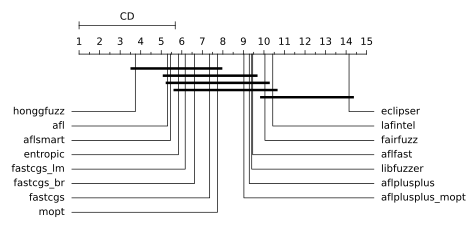

In [5]:
# The critial difference plot visualizes this ranking
SVG(results.critical_difference_plot)

In [6]:
results.rank_by_median_and_average_rank.to_frame()

,average rank
fuzzer,
honggfuzz,3.738095
afl,5.309524
aflsmart,5.452381
entropic,5.833333
fastcgs_lm,6.166667
fastcgs_br,6.619048
fastcgs,7.357143
mopt,7.738095
aflplusplus_mopt,9.023810


### Rank by pair-wise statistical test wins on benchmarks, then by average rank


In [7]:
results.rank_by_stat_test_wins_and_average_rank.to_frame()

,average rank
fuzzer,
honggfuzz,3.833333
afl,4.976190
aflsmart,5.476190
entropic,6.023810
fastcgs_lm,6.285714
fastcgs_br,6.738095
fastcgs,7.309524
mopt,7.904762
aflplusplus_mopt,8.690476


### Rank by median on benchmarks, then by avereage normalized score

In [8]:
results.rank_by_median_and_average_normalized_score.to_frame()

,average normalized score
fuzzer,
honggfuzz,97.077537
entropic,92.542417
afl,90.383558
lafintel,90.352503
aflsmart,90.320366
aflplusplus,88.456202
fastcgs_lm,87.967102
libfuzzer,87.768016
aflfast,87.138512


### Rank by average rank on benchmarks, then by avereage rank

In [9]:
results.rank_by_average_rank_and_average_rank.to_frame()

,average rank
fuzzer,
honggfuzz,3.666667
afl,5.071429
aflsmart,5.404762
entropic,5.833333
fastcgs_lm,6.380952
fastcgs_br,6.809524
fastcgs,7.428571
mopt,7.833333
aflplusplus_mopt,8.857143


# Benchmark level results

In [10]:
# List benchmarks
benchmarks = {b.name:b for b in results.benchmarks}
for benchmark_name in benchmarks.keys(): print(benchmark_name)

bloaty_fuzz_target
curl_curl_fuzzer_http
freetype2-2017
harfbuzz-1.3.2
jsoncpp_jsoncpp_fuzzer
lcms-2017-03-21
libjpeg-turbo-07-2017
libpcap_fuzz_both
libpng-1.2.56
libxml2-v2.9.2
mbedtls_fuzz_dtlsclient
openssl_x509
openthread-2019-12-23
php_php-fuzz-parser
proj4-2017-08-14
re2-2014-12-09
sqlite3_ossfuzz
systemd_fuzz-link-parser
vorbis-2017-12-11
woff2-2016-05-06
zlib_zlib_uncompress_fuzzer


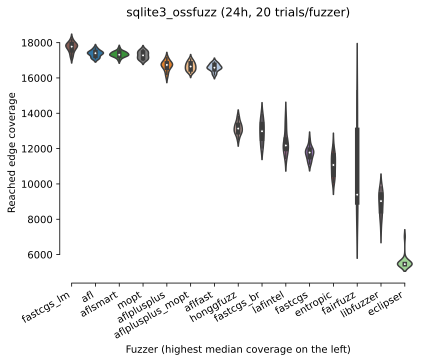

In [11]:
sqlite = benchmarks['sqlite3_ossfuzz']
SVG(sqlite.violin_plot)

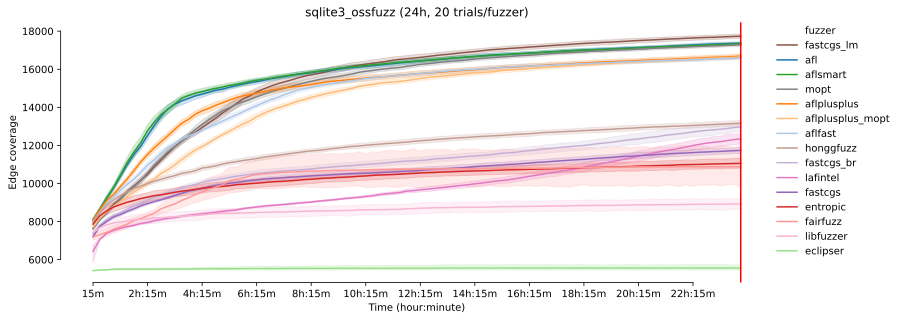

In [12]:
SVG(sqlite.coverage_growth_plot)

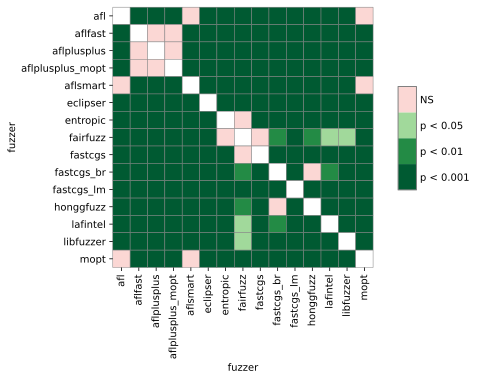

In [13]:
SVG(sqlite.mann_whitney_plot)

In [14]:
# Show p values
sqlite.mann_whitney_p_values

fuzzer,afl,aflfast,aflplusplus,aflplusplus_mopt,aflsmart,eclipser,entropic,fairfuzz,fastcgs,fastcgs_br,fastcgs_lm,honggfuzz,lafintel,libfuzzer,mopt
fuzzer,,,,,,,,,,,,,,,
afl,NaN,6.795615e-08,1.917712e-07,6.795615e-08,5.608517e-01,6.757379e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.786039e-08,5.895917e-05,6.795615e-08,6.795615e-08,6.795615e-08,2.616165e-01
aflfast,6.795615e-08,NaN,1.298038e-01,5.075053e-01,6.795615e-08,6.757379e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.786039e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.795615e-08
aflplusplus,1.917712e-07,1.298038e-01,NaN,5.249480e-01,9.172773e-08,6.757379e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.786039e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.795615e-08,3.415576e-07
aflplusplus_mopt,6.795615e-08,5.075053e-01,5.249480e-01,NaN,9.172773e-08,6.757379e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.786039e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.795615e-08,1.657079e-07
aflsmart,5.608517e-01,6.795615e-08,9.172773e-08,9.172773e-08,NaN,6.757379e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.786039e-08,3.490393e-05,6.795615e-08,6.795615e-08,6.795615e-08,4.487875e-01
eclipser,6.757379e-08,6.757379e-08,6.757379e-08,6.757379e-08,6.757379e-08,NaN,6.757379e-08,6.757379e-08,6.757379e-08,6.747850e-08,6.757379e-08,6.757379e-08,6.757379e-08,6.757379e-08,6.757379e-08
entropic,6.795615e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.757379e-08,NaN,3.369152e-01,4.600727e-04,1.063112e-07,6.795615e-08,6.795615e-08,2.355659e-06,6.795615e-08,6.795615e-08
fairfuzz,6.795615e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.757379e-08,3.369152e-01,NaN,1.719297e-01,9.783050e-03,6.795615e-08,6.557193e-03,4.679162e-02,2.748342e-02,6.795615e-08
fastcgs,6.795615e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.795615e-08,6.757379e-08,4.600727e-04,1.719297e-01,NaN,3.411263e-07,6.795615e-08,7.898034e-08,5.629036e-04,6.795615e-08,6.795615e-08
